In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [105]:
df_ispa = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_kesehatan/ispa_month/data_ispa.csv')

**filter data yang dibutuhkan**

In [106]:
# ikutin mau filter apa?
df_ispa_2 = df_ispa[df_ispa['year']==2022]

In [107]:
df_overlay = df_ispa_2[df_ispa_2['KABKOT']=='JAKARTA TIMUR']

**nambahin label month**

In [110]:
import calendar
# Format for monthly graph
df_overlay['month_name'] = pd.to_datetime(df_ispa_2['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
df_overlay= df_overlay.set_index('month_name')

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_5388/2818953008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overlay['month_name'] = pd.to_datetime(df_ispa_2['month'], format='%m').dt.month_name()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


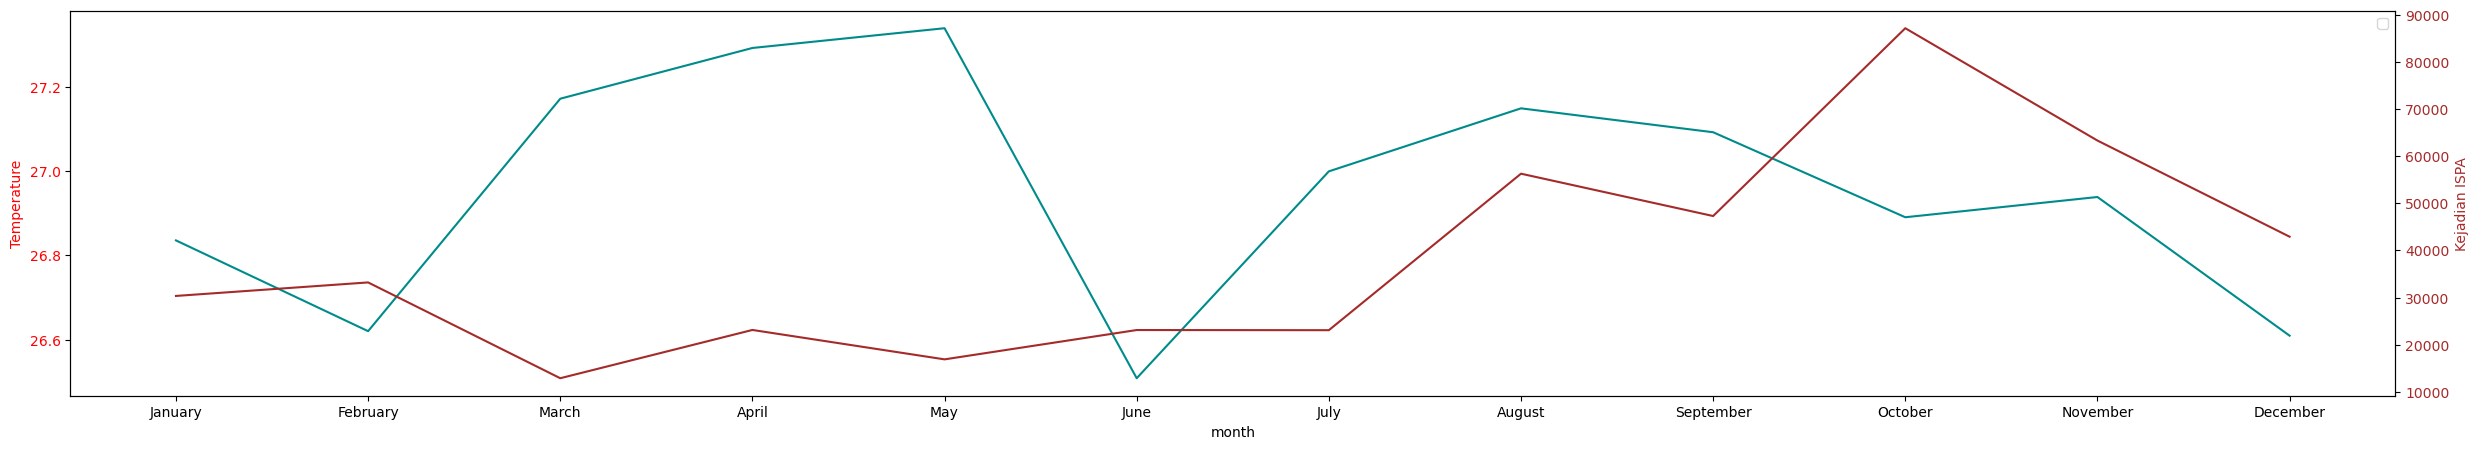

In [113]:
x = df_overlay.index
y1 = df_overlay['t2m']
y2 = df_overlay['ispa']

fig, ax1 = plt.subplots(figsize=(30,5)) 

ax1.set_xlabel('month') 
ax1.set_ylabel('Temperature', color = 'red') 
ax1.plot(x, y1, color = 'darkcyan') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Kejadian ISPA', color = 'brown') 
ax2.plot(x, y2, color = 'brown') 
ax2.tick_params(axis ='y', labelcolor = 'brown')

plt.legend() 
plt.show()

In [ ]:
indicators = ['tb', 'pm2p5']
df_overlay['month'] = pd.to_datetime(df_overlay['time']).dt.month_name()

# Group data by KABKOT
grouped_data = df_overlay.groupby('KABKOT')

# Plot time series for 'tb' and 'pm2p5' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(25, len(grouped_data)*5), sharex=True)

for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['tb']
    y2 = group['pm2p5']

    ax.plot(x, y1, label='tb', marker='o', color='darkcyan')
    ax.set_ylabel(f'{name} - Jumlah Kejadian Tuberkulosis (jiwa)', color='darkcyan')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='pm2p5', marker='o', color='brown')
    ax2.set_ylabel(f'{name} - Rata-Rata Konsentrasi PM 2.5 (µg/m³)', color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Add common x-axis label
axs[-1].set_xlabel('Month')

plt.tight_layout()